In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from scipy import ndimage

Upload an image:


Saving corners_building_top.jpg to corners_building_top.jpg


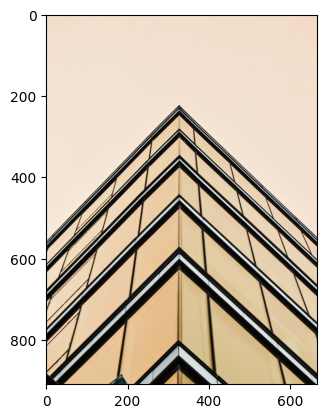

In [4]:
# Step 1: Upload Image
print("Upload an image:")
uploaded = files.upload()
file_name = next(iter(uploaded))
file_data = np.frombuffer(uploaded[file_name], np.uint8)
img = cv2.imdecode(file_data, cv2.IMREAD_COLOR)
plt.imshow(img)


In [5]:
# Step 2: Convert to Grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [6]:
# Step 3: Apply Sobel Operator
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel = cv2.magnitude(sobel_x, sobel_y)

In [7]:
# Step 4: Apply Prewitt Operator (Manually define kernels)
kernelx = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
kernely = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
prewitt_x = ndimage.convolve(gray, kernelx)
prewitt_y = ndimage.convolve(gray, kernely)
prewitt = np.hypot(prewitt_x, prewitt_y)

In [8]:
# Step 5: Apply Canny Edge Detector
canny = cv2.Canny(gray, 100, 200)


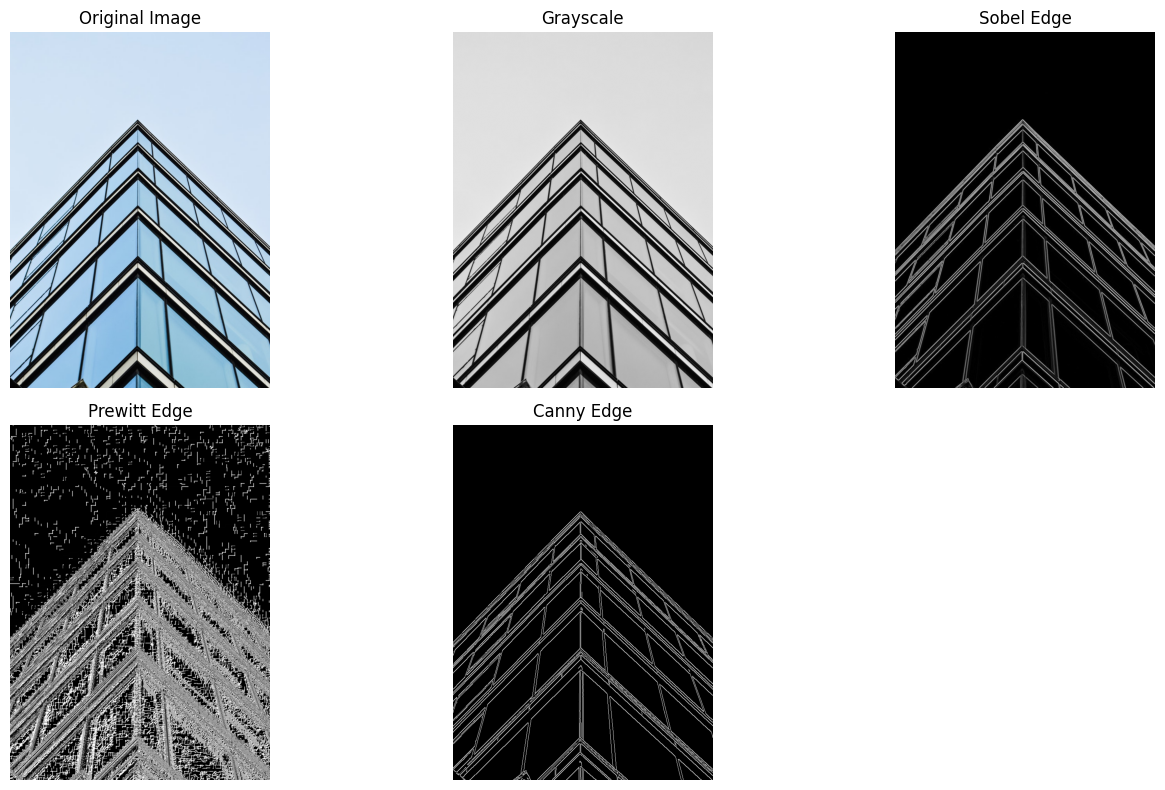

In [9]:
# Step 6: Display Results
plt.figure(figsize=(14, 8))

plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(gray, cmap='gray')
plt.title('Grayscale')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(sobel, cmap='gray')
plt.title('Sobel Edge')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(prewitt, cmap='gray')
plt.title('Prewitt Edge')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(canny, cmap='gray')
plt.title('Canny Edge')
plt.axis('off')

plt.tight_layout()
plt.show()